In [43]:
import pandas as pd
import language_tool_python
import matplotlib.pyplot as plt


In [44]:
# Load TFADJUSTED non-suspicion dataset
df = pd.read_csv('tfadjusted_non_suspicion_results.csv')
print(df.columns)
df.head(10)

Index(['Input.text', 'Answer.sentiment.label', 'Input.label', 'Title',
       'Description'],
      dtype='object')


,Input.text,Answer.sentiment.label,Input.label,Title,Description
0,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
1,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
2,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
3,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
4,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
5,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
6,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
7,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
8,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
9,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...


In [45]:
# Filter for perturbed sentences (Computer-altered)
perturbed_df = df[df['Answer.sentiment.label'] == 'Computer-altered']
# Initialize LanguageTool for grammar checking
grammar_checker = language_tool_python.LanguageTool('en-US')

In [46]:
# Analyze grammatical errors for perturbed sentences
grammar_errors = []
for text in perturbed_df['Input.text']:
    errors = len(grammar_checker.check(text))  # Count the number of grammar errors
    grammar_errors.append(errors)

In [47]:
# Add the grammaticality analysis results to the DataFrame
perturbed_df['GrammarErrorCount'] = grammar_errors

/var/folders/02/nl6dyky947d7rxn23s6kktc40000gn/T/ipykernel_66352/1421468894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perturbed_df['GrammarErrorCount'] = grammar_errors


In [48]:
# Save the updated DataFrame to a new CSV
perturbed_df.to_csv('tfadjusted_grammaticality_results.csv', index=False)

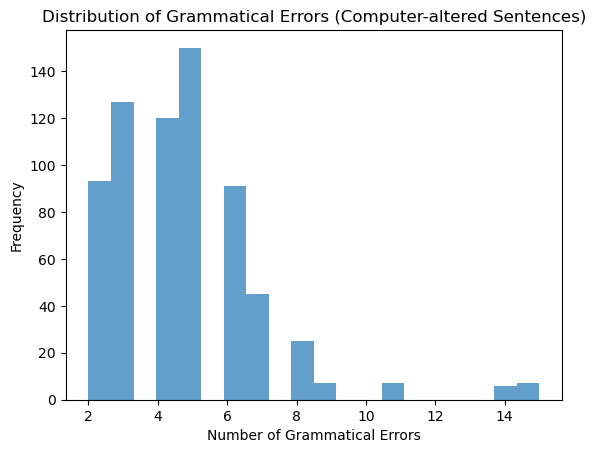

In [49]:
# Verification: Plot a histogram of grammatical errors
plt.hist(perturbed_df['GrammarErrorCount'], bins=20, alpha=0.7)
plt.xlabel('Number of Grammatical Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Grammatical Errors (Computer-altered Sentences)')
plt.show()

In [50]:
# Verification: Inspect the correlation with non-suspicion scores
if 'non_suspicion_column' in perturbed_df.columns:  # Replace with the actual column name
    correlation = perturbed_df['GrammarErrorCount'].corr(perturbed_df['non_suspicion_column'])
    print("Correlation between grammatical errors and non-suspicion scores:", correlation)


# Verification: Preview the first few rows
print(perturbed_df.head())

                                          Input.text Answer.sentiment.label  \
0  the sinister inspiration that fuelled devito's...       Computer-altered   
3  the sinister inspiration that fuelled devito's...       Computer-altered   
5  the sinister inspiration that fuelled devito's...       Computer-altered   
7  the sinister inspiration that fuelled devito's...       Computer-altered   
9  the sinister inspiration that fuelled devito's...       Computer-altered   

  Input.label                           Title  \
0        real  Guess reviews are real or fake   
3        real  Guess reviews are real or fake   
5        real  Guess reviews are real or fake   
7        real  Guess reviews are real or fake   
9        real  Guess reviews are real or fake   

                                         Description  GrammarErrorCount  
0  You will be randomly shown an online movie rev...                  3  
3  You will be randomly shown an online movie rev...                  3  
5  You w